<a href="https://colab.research.google.com/github/shounakd56/Image-Caption-Generation-using-Deep-Learning/blob/main/Week%204/WiDS_Week_4_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
from nltk.corpus import stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/WiDS/CV/sentiment_analysis_train.csv",encoding='cp1252')
test_data=pd.read_csv("/content/gdrive/MyDrive/WiDS/CV/sentiment_analysis_test.csv",encoding='cp1252')

In [ ]:
train

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
4860,3-star analyst Joe Wittine from Longbow Resear...,positive
4861,Our standardised services have met with a posi...,positive
4862,The Kyroskoski investment is to be completed i...,neutral
4863,The Group 's cash flow from operations will be...,positive


In [ ]:
train2=train.replace('positive',1)
train2=train2.replace('neutral',0)
train2=train2.replace('negative',-1)

In [ ]:
train2

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0
...,...,...
4860,3-star analyst Joe Wittine from Longbow Resear...,1
4861,Our standardised services have met with a posi...,1
4862,The Kyroskoski investment is to be completed i...,0
4863,The Group 's cash flow from operations will be...,1


In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train2['clean_text']= train2['Sentence'].apply(lambda x:remove_punctuation(x))
train2.head()

,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,1,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,ESI on lows down 150 to 250 BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",1,For the last quarter of 2010 Componenta s net...
3,According to the Finnish-Russian Chamber of Co...,0,According to the FinnishRussian Chamber of Com...
4,The Swedish buyout firm has sold its remaining...,0,The Swedish buyout firm has sold its remaining...


In [ ]:
train2['low_clean_text']= train2['clean_text'].apply(lambda x: x.lower())
train2.head()

,Sentence,Sentiment,clean_text,low_clean_text
0,The GeoSolutions technology will leverage Bene...,1,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,ESI on lows down 150 to 250 BK a real possibility,esi on lows down 150 to 250 bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",1,For the last quarter of 2010 Componenta s net...,for the last quarter of 2010 componenta s net...
3,According to the Finnish-Russian Chamber of Co...,0,According to the FinnishRussian Chamber of Com...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,0,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [ ]:
train2['tokenized_text'] = train2['low_clean_text'].apply(lambda x: x.split()) 

In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
train2['no_stopwords']= train2['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [ ]:
#defining a function for lemmatizing
def lemmatizing(text):
  lemmatize_text = [lemmatizer.lemmatize(word) for word in text]
  return lemmatize_text
train2['msg_lemmatized']=train2['no_stopwords'].apply(lambda x: lemmatizing(x))
train2

,Sentence,Sentiment,clean_text,low_clean_text,tokenized_text,no_stopwords,msg_lemmatized
0,The GeoSolutions technology will leverage Bene...,1,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,ESI on lows down 150 to 250 BK a real possibility,esi on lows down 150 to 250 bk a real possibility,"[esi, on, lows, down, 150, to, 250, bk, a, rea...","[esi, lows, 150, 250, bk, real, possibility]","[esi, low, 150, 250, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",1,For the last quarter of 2010 Componenta s net...,for the last quarter of 2010 componenta s net...,"[for, the, last, quarter, of, 2010, componenta...","[last, quarter, 2010, componenta, net, sales, ...","[last, quarter, 2010, componenta, net, sale, d..."
3,According to the Finnish-Russian Chamber of Co...,0,According to the FinnishRussian Chamber of Com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,0,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, 224, ...","[swedish, buyout, firm, sold, remaining, 224, ..."
...,...,...,...,...,...,...,...
4860,3-star analyst Joe Wittine from Longbow Resear...,1,3star analyst Joe Wittine from Longbow Researc...,3star analyst joe wittine from longbow researc...,"[3star, analyst, joe, wittine, from, longbow, ...","[3star, analyst, joe, wittine, longbow, resear...","[3star, analyst, joe, wittine, longbow, resear..."
4861,Our standardised services have met with a posi...,1,Our standardised services have met with a posi...,our standardised services have met with a posi...,"[our, standardised, services, have, met, with,...","[standardised, services, met, positive, recept...","[standardised, service, met, positive, recepti..."
4862,The Kyroskoski investment is to be completed i...,0,The Kyroskoski investment is to be completed i...,the kyroskoski investment is to be completed i...,"[the, kyroskoski, investment, is, to, be, comp...","[kyroskoski, investment, completed, late, 2011...","[kyroskoski, investment, completed, late, 2011..."
4863,The Group 's cash flow from operations will be...,1,The Group s cash flow from operations will be ...,the group s cash flow from operations will be ...,"[the, group, s, cash, flow, from, operations, ...","[group, cash, flow, operations, positive]","[group, cash, flow, operation, positive]"


In [ ]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train2.Sentence)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 40')

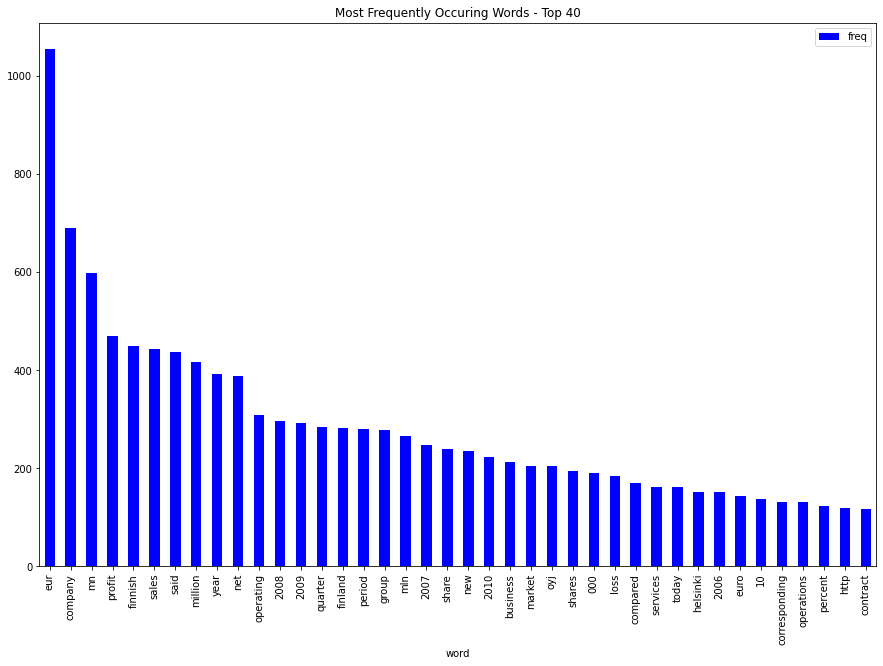

In [ ]:
frequency.head(40).plot(x='word', y='freq', kind='bar', figsize=(15, 10), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 40")

Text(0.5, 1.0, 'WordCloud (Overall)')

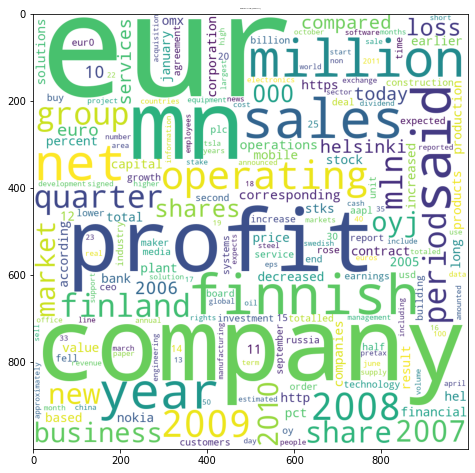

In [ ]:
# WordCloud for overall dataset

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud (Overall)", fontsize = 2)

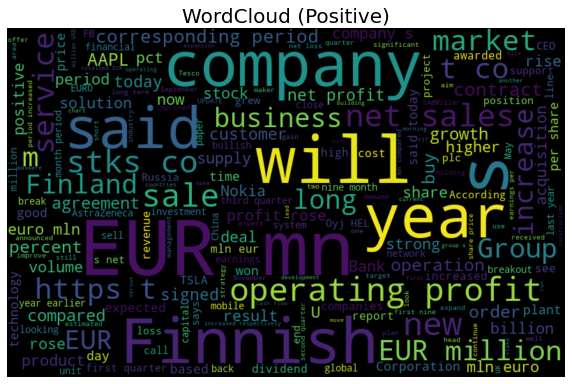

In [ ]:
# WordCloud for Positive Sentences

positive_words =' '.join([text for text in train['Sentence'][train2['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Positive)", fontsize = 20)
plt.show()

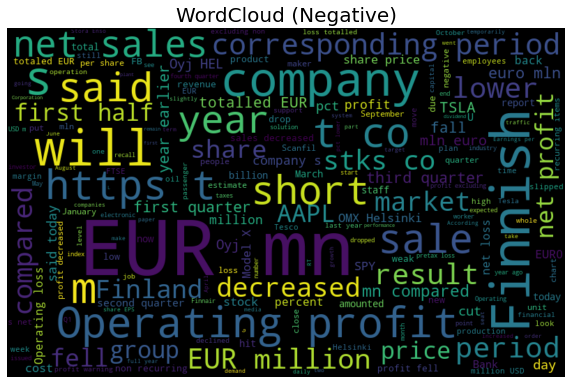

In [ ]:
# WordCloud for Negative Sentences

negative_words =' '.join([text for text in train['Sentence'][train2['Sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Negative)", fontsize = 20)
plt.show()

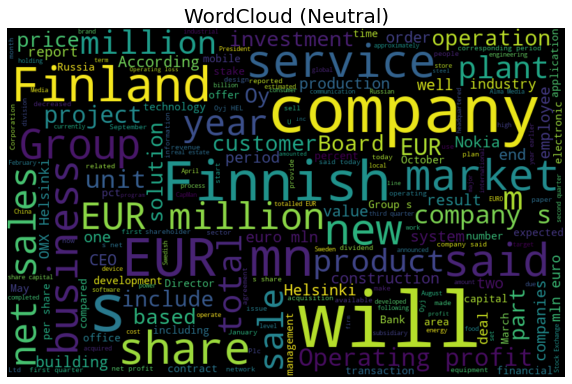

In [ ]:
# WordCloud for Neutral Sentences

neutral_words =' '.join([text for text in train['Sentence'][train2['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Neutral)", fontsize = 20)
plt.show()

In [ ]:
# random split train and test data
index = train2.index
train2['random_number'] = np.random.randn(len(index))
train_ = train2[train2['random_number'] <= 0.9]
test_ = train2[train2['random_number'] > 0.9]

In [ ]:
train_matrix = cv.fit_transform(train_['Sentence'])
test_matrix = cv.transform(test_['Sentence'])

In [ ]:
lr.fit(train_matrix,train_['Sentiment'])


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = lr.predict(test_matrix)


In [ ]:
predictions

array([ 0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  1,  0,
       -1,  0,  0,  0,  1,  0, -1,  0,  1, -1,  0,  0,  0, -1,  0,  1,  0,
        1,  0, -1,  1,  0,  0,  0,  1,  0,  0, -1, -1,  0,  0,  0,  1,  0,
        0,  0, -1,  0,  0,  0,  0,  1,  1,  1,  1, -1,  0,  0,  0,  1,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,
        0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  1,  1,  0,  1, -1,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  0,  0, -1,  0,  1,  0,  1,  0,  0, -1,  0,
        0,  0, -1,  1,  0,  1,  0,  0,  0, -1,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  1, -1,  0, -1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  1,  0,  1

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(test_['Sentiment'])
confusion_matrix(predictions,test_['Sentiment'])

array([[ 21,  58,   7],
       [ 83, 370,  90],
       [ 27,  44, 181]])

In [ ]:
print(classification_report(predictions,test_['Sentiment']))


              precision    recall  f1-score   support

          -1       0.16      0.24      0.19        86
           0       0.78      0.68      0.73       543
           1       0.65      0.72      0.68       252

    accuracy                           0.65       881
   macro avg       0.53      0.55      0.54       881
weighted avg       0.69      0.65      0.66       881



In [ ]:
test_data

,Sentence
0,Operating loss totaled EUR 25mn compared to a ...
1,Renewed AB InBev Bid for SABMiller Ups Stake i...
2,Rautaruukki Corporation Stock exchange release...
3,Etteplan targets to employ at least 20 people ...
4,Thanks to its extensive industry and operation...
...,...
972,RISING costs have forced packaging producer Hu...
973,Nordic Walking was first used as a summer trai...
974,"According shipping company Viking Line , the E..."
975,"In the building and home improvement trade , s..."


In [ ]:
test_transformed = cv.transform(test_data['Sentence'])

In [ ]:
prediction = lr.predict(test_transformed)


In [ ]:
prediction

array([ 0,  1,  1,  0,  0,  1,  1, -1,  0, -1,  0,  0,  1,  1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  1,  1, -1,  1,  0, -1,  0,  0, -1,  1,  0,
        1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        0,  1, -1, -1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0, -1,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  1,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  1,  1,  1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,
        1,  0,  1,  0, -1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,
       -1,  0,  1, -1,  0,  1,  0,  1,  0, -1,  1,  0, -1,  0,  1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  0

In [ ]:
predict=pd.DataFrame({'Sentiment':prediction})

In [ ]:
predict

,Sentiment
0,0
1,1
2,1
3,0
4,0
...,...
972,0
973,0
974,0
975,-1


In [ ]:
sent=test_data.Sentence

In [ ]:
final=pd.concat([sent,predict],axis=1)

In [ ]:
final

,Sentence,Sentiment
0,Operating loss totaled EUR 25mn compared to a ...,0
1,Renewed AB InBev Bid for SABMiller Ups Stake i...,1
2,Rautaruukki Corporation Stock exchange release...,1
3,Etteplan targets to employ at least 20 people ...,0
4,Thanks to its extensive industry and operation...,0
...,...,...
972,RISING costs have forced packaging producer Hu...,0
973,Nordic Walking was first used as a summer trai...,0
974,"According shipping company Viking Line , the E...",0
975,"In the building and home improvement trade , s...",-1


In [ ]:
final=final.replace(1,'Positive')
final=final.replace(0,'Neutral')
final=final.replace(-1,'Negative')

In [ ]:
final

,Sentence,Sentiment
0,Operating loss totaled EUR 25mn compared to a ...,Neutral
1,Renewed AB InBev Bid for SABMiller Ups Stake i...,Positive
2,Rautaruukki Corporation Stock exchange release...,Positive
3,Etteplan targets to employ at least 20 people ...,Neutral
4,Thanks to its extensive industry and operation...,Neutral
...,...,...
972,RISING costs have forced packaging producer Hu...,Neutral
973,Nordic Walking was first used as a summer trai...,Neutral
974,"According shipping company Viking Line , the E...",Neutral
975,"In the building and home improvement trade , s...",Negative
